In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#Data importeren
df: pd.DataFrame = pd.read_csv('Datasets/i4talent_alt.csv', sep=',')
df.head()

,WerknemerID,datum,geboortedatum,indiensttreding_datum,uitdiensttreding_datum,leeftijd,lengte_dienst,stad,afdeling,klant_id,geslacht_id,geslacht,uitdiensttreding_reden,uitdiensttreding_type,STATUS_JAAR,STATUS,BUSINESS_UNIT
0,6962,12/31/18 5:06,6/26/89 5:06,5/23/13 5:06,1/1/05 5:06,29.0,5.0,Amstelveen,BI,30,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
1,22981,12/30/16 5:06,8/25/83 5:06,4/24/10 5:06,1/1/05 5:06,33.0,6.0,Utrecht,Accountant,21,M,Man,Niet van toepassing,Niet van toepassing,2016,Actief,Detachering
2,5325,12/31/18 5:06,4/24/76 5:06,6/9/06 5:06,1/1/05 5:06,42.0,12.0,Amsterdam,BI,42,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
3,8193,12/31/18 5:06,10/26/98 5:06,4/28/18 5:06,1/1/05 5:06,20.0,NaN,Utrecht,BI,21,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
4,5926,12/31/13 5:06,3/19/81 5:06,1/9/09 5:06,1/1/05 5:06,32.0,4.0,Den Haag,Accountant,18,M,Man,Niet van toepassing,Niet van toepassing,2013,Actief,Detachering


In [106]:
#Er missen leeftijden, dus via geboortedatum leeftijden berekend
def fill_age(row):
    if pd.isnull(row['leeftijd']):
        birth_year = pd.to_datetime(row['geboortedatum']).year
        return row['STATUS_JAAR'] - birth_year
    else:
        return row['leeftijd']

df['leeftijd'] = df.apply(fill_age, axis=1)

In [107]:
# Remove timecodes
def remove_time(row, column_name, delimiter=' '):
    text = str(row[column_name])
    split_text = text.split(delimiter)
    return split_text[0]

df["datum"] = df.apply(remove_time, axis=1, args=(df['datum'],))
# df["geboortedatum"] = df.apply(remove_time, axis=1)
# df["indiensttreding_datum"] = df.apply(remove_time, axis=1)

df.head()

In [108]:
#column lengte dienst aanmaken
df['uitdiensttreding_datum'] = pd.to_datetime(df['uitdiensttreding_datum'])
df['indiensttreding_datum'] = pd.to_datetime(df['indiensttreding_datum'])
df['datum'] = pd.to_datetime(df['datum'])
max_udt = df['datum'].max()

def fill_lengte_dienst(row):
    if pd.isnull(row['lengte_dienst']):
        indiensttreding_date = row['indiensttreding_datum']
        uitdiensttreding_date = row['uitdiensttreding_datum']
        
        if uitdiensttreding_date.year < 1999:
            lengte_dienst = (max_udt - indiensttreding_date).days / 365.25
        else:
            lengte_dienst = (uitdiensttreding_date - indiensttreding_date).days / 365.25
        
        return int(math.ceil(lengte_dienst))
    else:
        return int(row['lengte_dienst'])

df['lengte_dienst'] = df.apply(fill_lengte_dienst, axis=1)


In [109]:
#Zorgt ervoor dat column status overeenkomt met uitdiensttrending datum
df['uitdiensttreding_datum'] = pd.to_datetime(df['uitdiensttreding_datum'])

df['STATUS_Actief'] = df.apply(lambda row: 1 if row['uitdiensttreding_datum'].year < 1999 else 0, axis=1)

df['STATUS_BeÌÇindigd'] = df.apply(lambda row: 0 if row['uitdiensttreding_datum'].year < 1999 else 1, axis=1)


In [110]:
#value van beeindigd hernoemd
df['STATUS'] = df['STATUS'].replace({'BeÌÇindigd': 'Beeindigd'})
df

,WerknemerID,datum,geboortedatum,indiensttreding_datum,uitdiensttreding_datum,leeftijd,lengte_dienst,stad,afdeling,klant_id,geslacht_id,geslacht,uitdiensttreding_reden,uitdiensttreding_type,STATUS_JAAR,STATUS,BUSINESS_UNIT,STATUS_Actief,STATUS_BeÌÇindigd
0,6962,2018-12-31 05:06:00,6/26/89 5:06,2013-05-23 05:06:00,2005-01-01 05:06:00,29.0,5,Amstelveen,BI,30,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering,0,1
1,22981,2016-12-30 05:06:00,8/25/83 5:06,2010-04-24 05:06:00,2005-01-01 05:06:00,33.0,6,Utrecht,Accountant,21,M,Man,Niet van toepassing,Niet van toepassing,2016,Actief,Detachering,0,1
2,5325,2018-12-31 05:06:00,4/24/76 5:06,2006-06-09 05:06:00,2005-01-01 05:06:00,42.0,12,Amsterdam,BI,42,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering,0,1
3,8193,2018-12-31 05:06:00,10/26/98 5:06,2018-04-28 05:06:00,2005-01-01 05:06:00,20.0,-13,Utrecht,BI,21,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering,0,1
4,5926,2013-12-31 05:06:00,3/19/81 5:06,2009-01-09 05:06:00,2005-01-01 05:06:00,32.0,4,Den Haag,Accountant,18,M,Man,Niet van toepassing,Niet van toepassing,2013,Actief,Detachering,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49748,23132,2018-12-31 05:06:00,4/20/84 5:06,2010-08-28 05:06:00,2005-01-01 05:06:00,34.0,-5,Rotterdam,Business analist,46,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering,0,1
49749,8025,2017-12-31 05:06:00,6/25/97 5:06,2017-08-12 05:06:00,2019-02-12 05:06:00,20.0,0,Amsterdam,NaN,44,M,Man,Niet van toepassing,Niet van toepassing,2017,Actief,Detachering,0,1
49750,2632,2014-12-31 05:06:00,4/27/61 5:06,1998-07-09 05:06:00,2005-01-01 05:06:00,53.0,16,Haarlem,Business analist,5,V,Vrouw,Niet van toepassing,Niet van toepassing,2014,Actief,Detachering,0,1
49751,7122,2014-12-31 05:06:00,9/8/90 5:06,2014-01-10 05:06:00,2019-12-30 05:06:00,24.0,0,Barendrecht,Credit controller,13,M,Man,Niet van toepassing,Niet van toepassing,2014,Actief,Detachering,0,1


array([[<Axes: title={'center': 'WerknemerID'}>,
        <Axes: title={'center': 'datum'}>,
        <Axes: title={'center': 'indiensttreding_datum'}>],
       [<Axes: title={'center': 'uitdiensttreding_datum'}>,
        <Axes: title={'center': 'leeftijd'}>,
        <Axes: title={'center': 'lengte_dienst'}>],
       [<Axes: title={'center': 'klant_id'}>,
        <Axes: title={'center': 'STATUS_JAAR'}>,
        <Axes: title={'center': 'STATUS_Actief'}>],
       [<Axes: title={'center': 'STATUS_BeÌÇindigd'}>, <Axes: >,
        <Axes: >]], dtype=object)

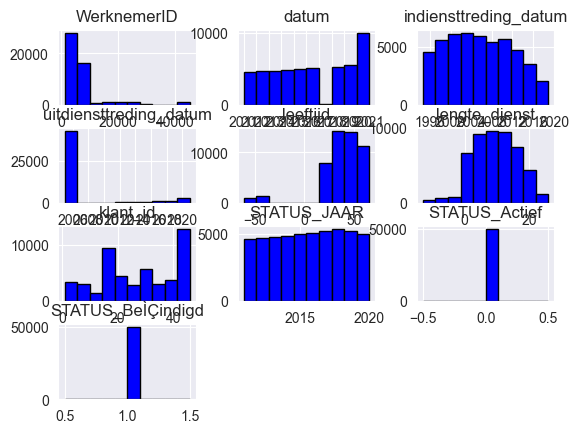

In [111]:
#Kijken voor outliers
df.hist(color='blue', edgecolor='black')

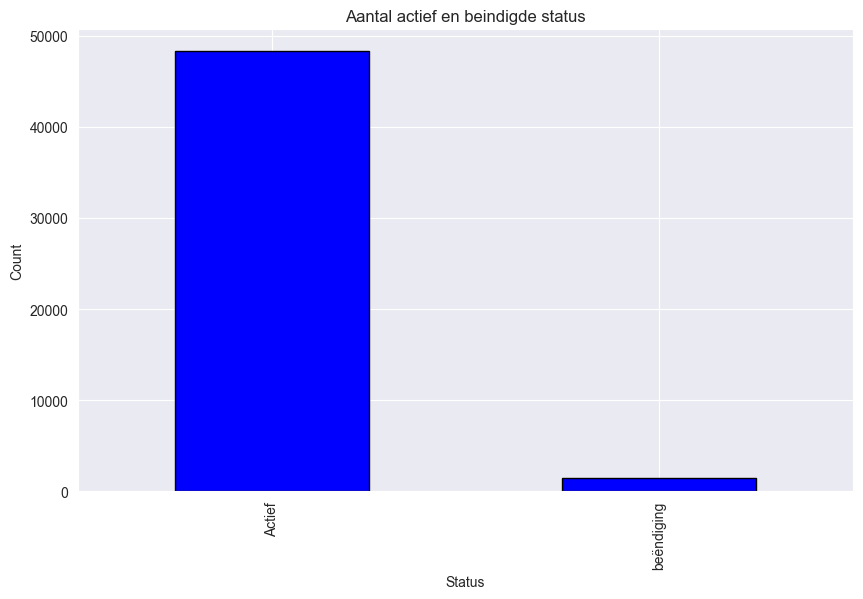

In [112]:
#Visualizaties
#Aantal actief en aantal beindigde status
import pandas as pd
import matplotlib.pyplot as plt
stad_counts = df['STATUS'].value_counts()
plt.figure(figsize=(10, 6))
stad_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Aantal actief en beindigde status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

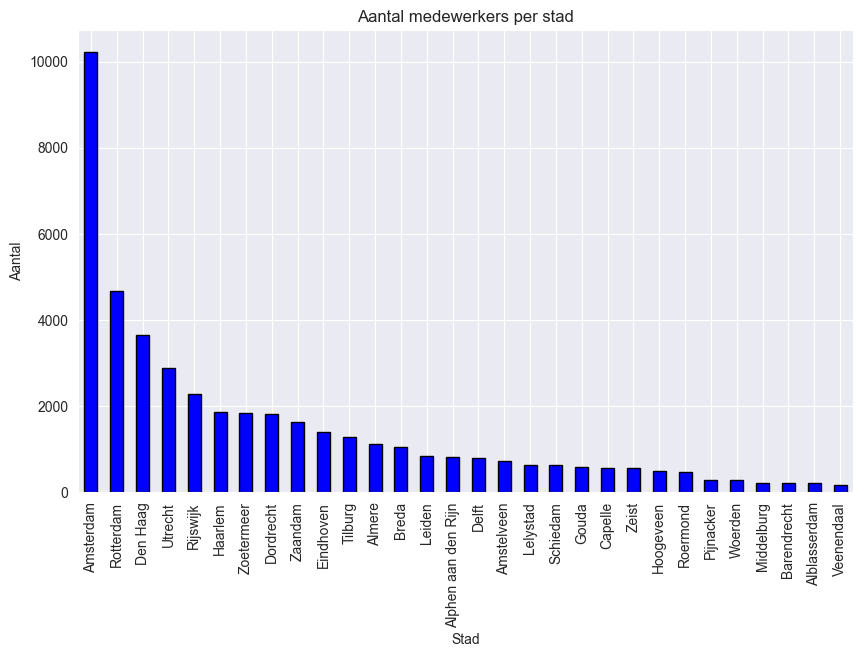

In [113]:
#Histogram aantal medewerkers per stad
stad_counts = df['stad'].value_counts()
plt.figure(figsize=(10, 6))
stad_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Aantal medewerkers per stad')
plt.xlabel('Stad')
plt.ylabel('Aantal')
plt.show()

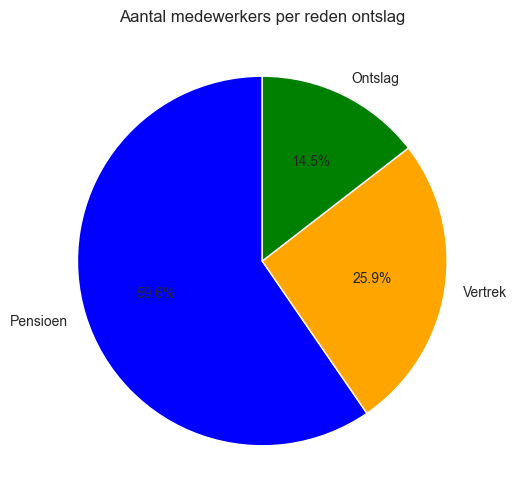

In [114]:
#Pie-chart aantal medewerkers per reden ontslag
new_df = df[df['uitdiensttreding_reden'] != 'Niet van toepassing']
stad_counts = new_df['uitdiensttreding_reden'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(stad_counts, labels=stad_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green', 'red'])
plt.title('Aantal medewerkers per reden ontslag')
plt.show()

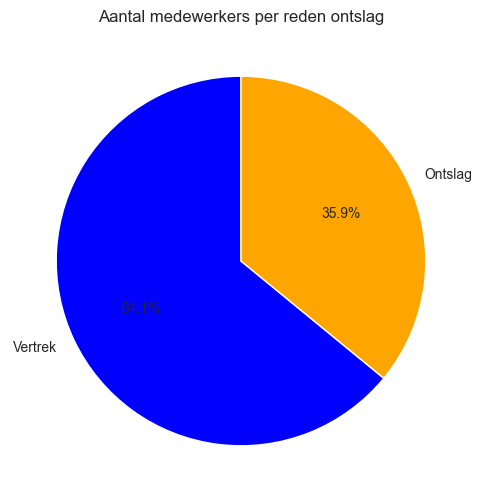

In [115]:
#histogram percentage beeindigde medewerkers per afdeling
aantal_mensen_per_afdeling_status = df.groupby(['afdeling', 'STATUS']).size().unstack(fill_value=0)
aantal_mensen_per_afdeling_status['Totaal'] = aantal_mensen_per_afdeling_status.sum(axis=1)

aantal_mensen_per_afdeling_status['Percentage Beeindigd'] = (
    aantal_mensen_per_afdeling_status['Beeindigd'] / aantal_mensen_per_afdeling_status['Totaal'] * 100
)

print(aantal_mensen_per_afdeling_status)
plt.bar(aantal_mensen_per_afdeling_status.index, aantal_mensen_per_afdeling_status['Percentage Beeindigd'], color='blue', edgecolor='black')
plt.xlabel('Afdeling')
plt.ylabel('Percentage Beeindigd')
plt.title('Percentage Beeindigd medewerkers per Afdeling')
plt.xticks(rotation=90, ha='right')
plt.show()


STATUS                     beëndiging  Totaal  Percentage Beeindigd
afdeling                                                           
Accountant                        106     106                 100.0
Administratief medewerker           1       1                 100.0
BI                                223     223                 100.0
Boekhouder                         36      36                 100.0
Business analist                   48      48                 100.0
Credit controller                  63      63                 100.0
Financial controller               52      52                 100.0
Project controller                  7       7                 100.0


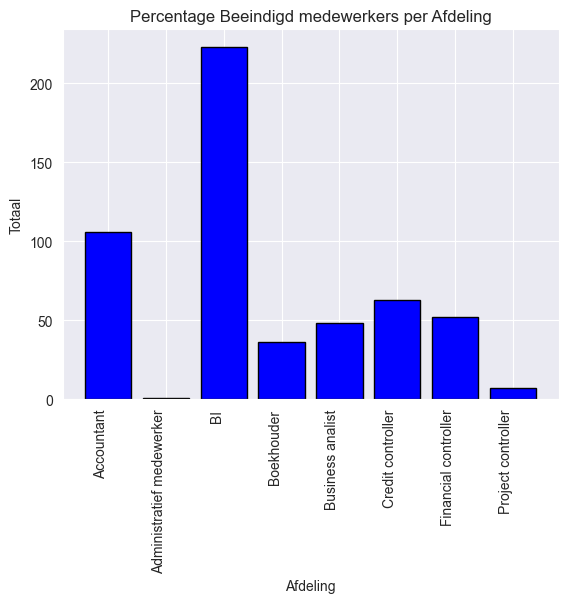

In [116]:
#histogram beeindigde medewerkers per afdeling
plt.bar(aantal_mensen_per_afdeling_status.index, aantal_mensen_per_afdeling_status['Beeindigd'], color='blue', edgecolor='black')
plt.xlabel('Afdeling')
plt.ylabel('Aantal Beeindigd')
plt.title('Aantal Beeindigd medewerkers per Afdeling')
plt.xticks(rotation=90, ha='right')
plt.show()


STATUS                     Actief  beëndiging  Totaal  Percentage Beeindigd
afdeling                                                                   
Accountant                   7596         183    7779              2.352487
Administratief medewerker      51           9      60             15.000000
BI                           6201         234    6435              3.636364
Boekhouder                   7390         317    7707              4.113144
Business analist             7451         105    7556              1.389624
Business controller            88           0      88              0.000000
Business development           30           5      35             14.285714
Credit controller            5257          83    5340              1.554307
Financial controller         8959         341    9300              3.666667
HR                             45           6      51             11.764706
IT                             14           4      18             22.222222
Legal       

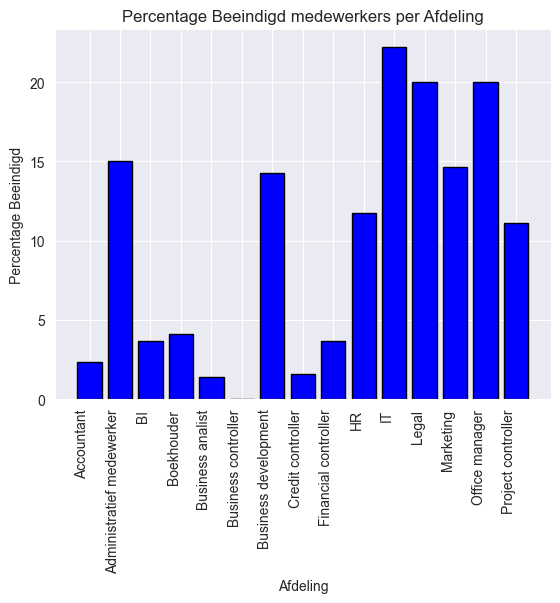

In [117]:
#gemiddelde lengte dienst per leeftijd
df['lengte_dienst'] = pd.to_numeric(df['lengte_dienst'], errors='coerce')

average_lengte_dienst_per_leeftijd = df.groupby('leeftijd')['lengte_dienst'].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_lengte_dienst_per_leeftijd.index, average_lengte_dienst_per_leeftijd, color='blue', edgecolor='black')

plt.title('Gemiddelde Lengte Dienst per Leeftijd')
plt.xlabel('Leeftijd')
plt.ylabel('Gemiddelde Lengte Dienst')
plt.show()

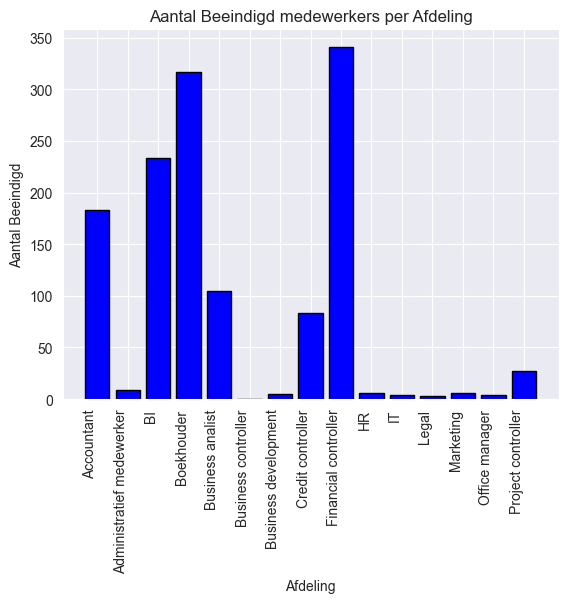

In [118]:
#Gemiddelde Lengte Dienst per Leeftijd (alleen met STATUS Beëindigd)
df['lengte_dienst'] = pd.to_numeric(df['lengte_dienst'], errors='coerce')
beindigd_data = df[df['STATUS'] == 'Beeindigd']
average_lengte_dienst_per_leeftijd = beindigd_data.groupby('leeftijd')['lengte_dienst'].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_lengte_dienst_per_leeftijd.index, average_lengte_dienst_per_leeftijd, color='blue', edgecolor='black')

plt.title('Gemiddelde Lengte Dienst per Leeftijd (alleen met STATUS Beëindigd)')
plt.xlabel('Leeftijd')
plt.ylabel('Gemiddelde Lengte Dienst')
plt.show()

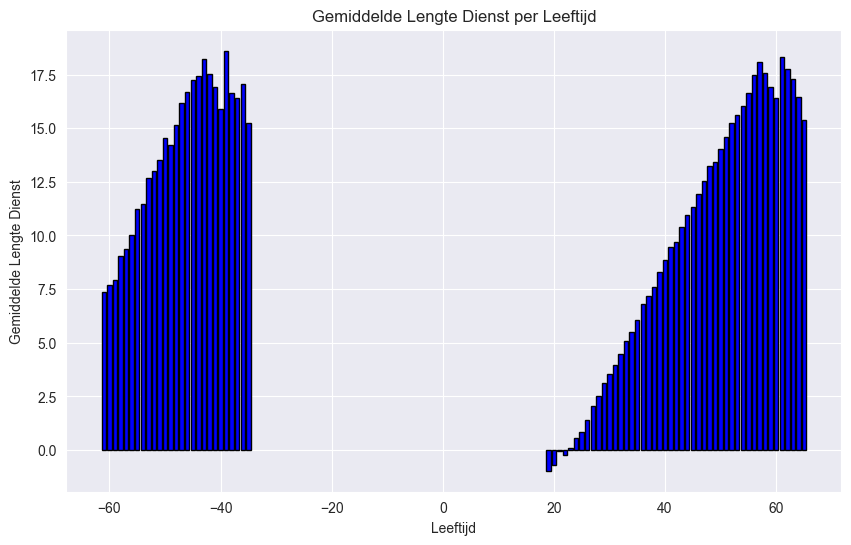

In [119]:
#histogram beeindige status per leeftijd
beeindigd_data = df[df['STATUS'] == 'Beeindigd']
plt.hist(beeindigd_data['leeftijd'], bins=20, color='blue', edgecolor='black')

plt.title('Histogram van Leeftijden voor Beëindigde Status')
plt.xlabel('Leeftijd')
plt.ylabel('Aantal mensen')
plt.show()


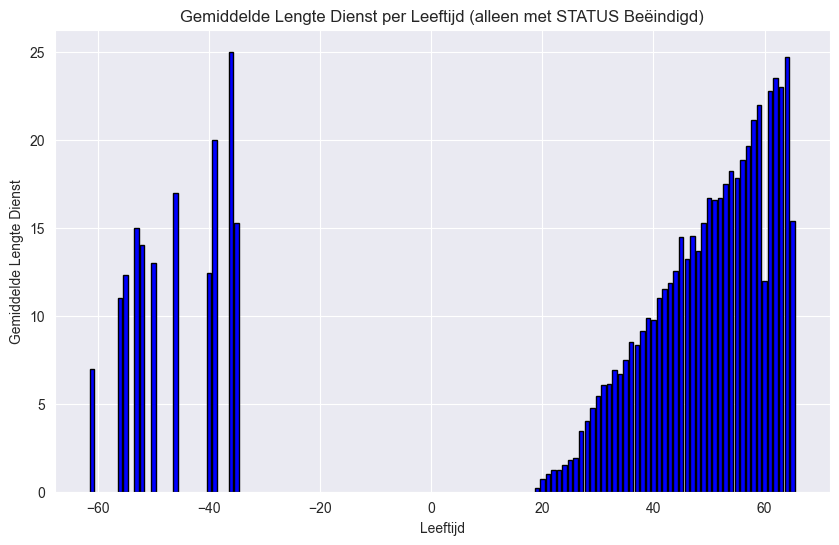

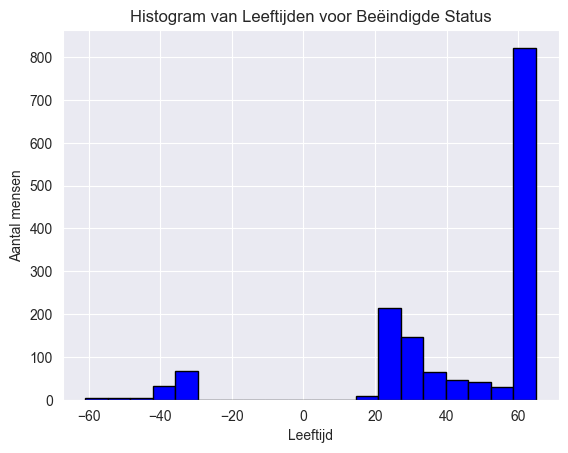

In [121]:
#histogram beeindigd medewerker per leeftijd per jaar
df['leeftijd'] = pd.to_numeric(df['leeftijd'], errors='coerce')
beindigd_data = df[df['STATUS'] == 'Beeindigd']

for year in range(2011, 2021):
    current_year_data = beindigd_data[beindigd_data['datum'].dt.year == year]

    plt.figure(figsize=(8, 6))
    plt.hist(current_year_data['leeftijd'], bins=20, color='blue', edgecolor='black')

    plt.title(f'Histogram of Ages for Beëindigd Status - {year}')
    plt.xlabel('Age')
    plt.ylabel('Aantal werknemers die ontslag hebben genomen')
    plt.show()

In [100]:
#Dummies
#Dummie uitdiensttreding reden
df = pd.get_dummies(df, columns=['uitdiensttreding_reden'])


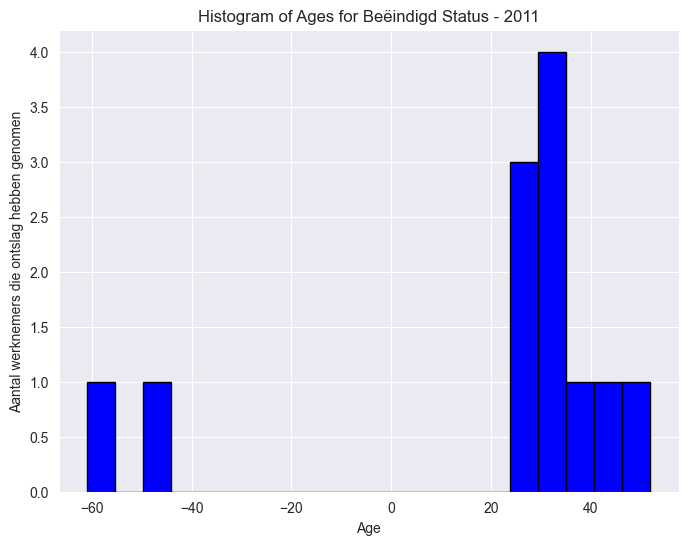

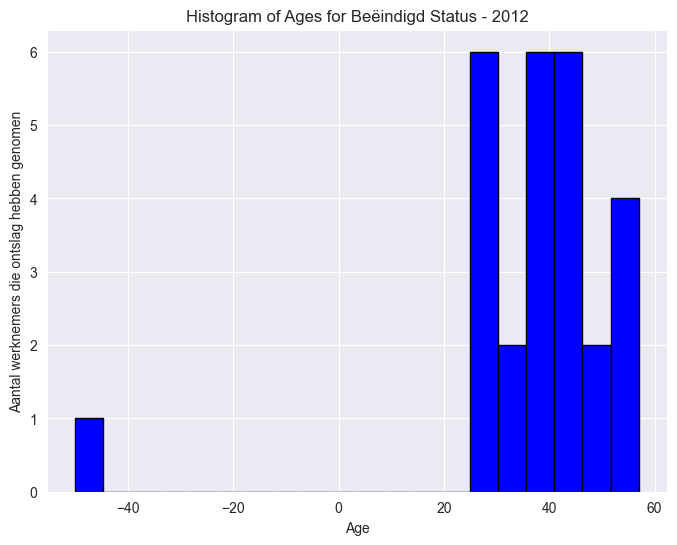

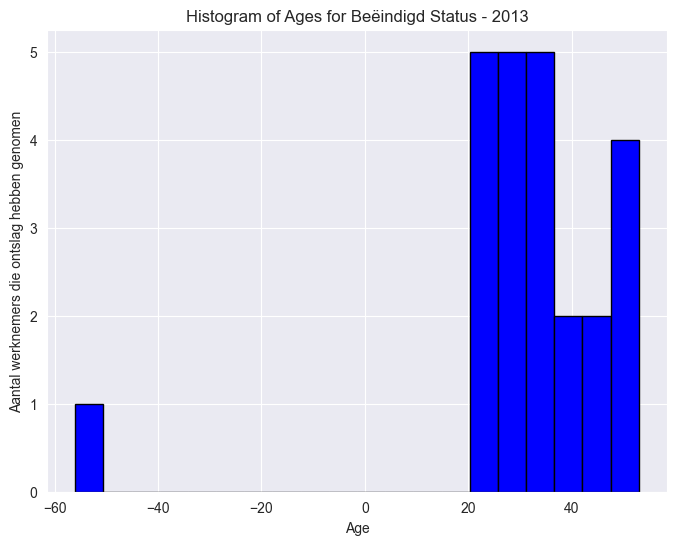

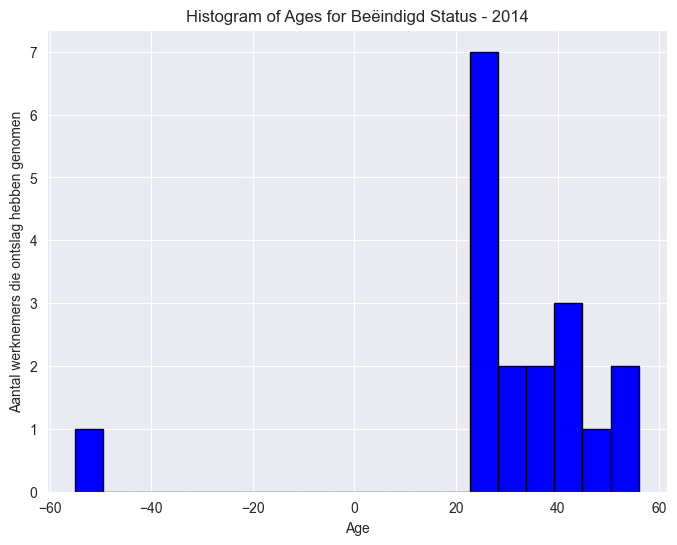

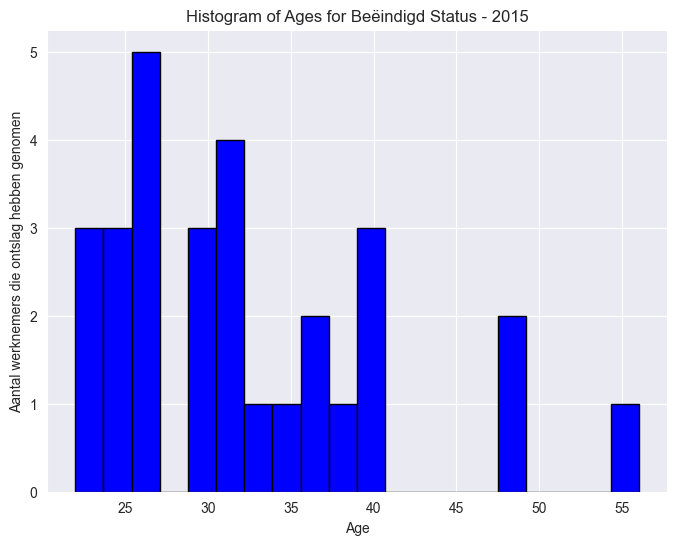

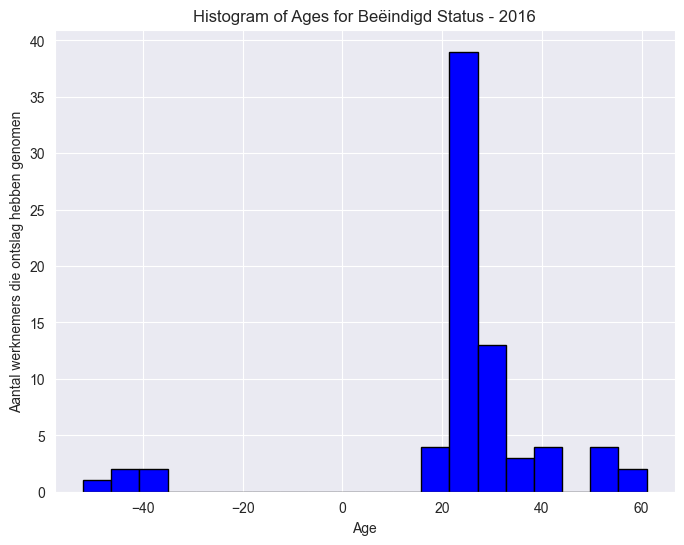

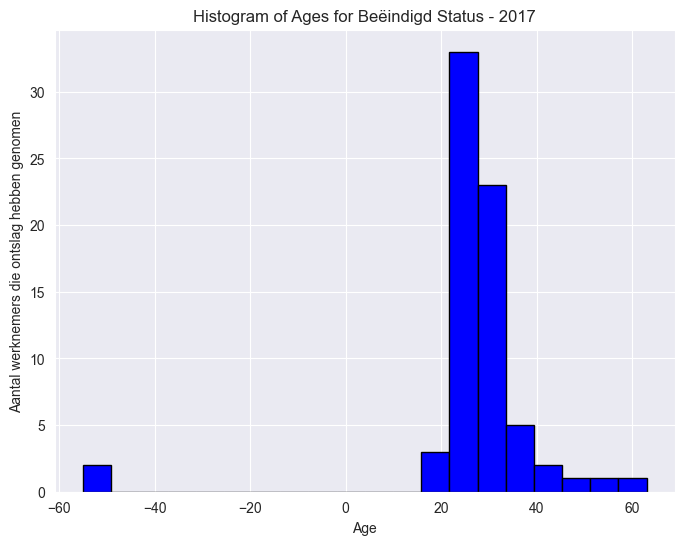

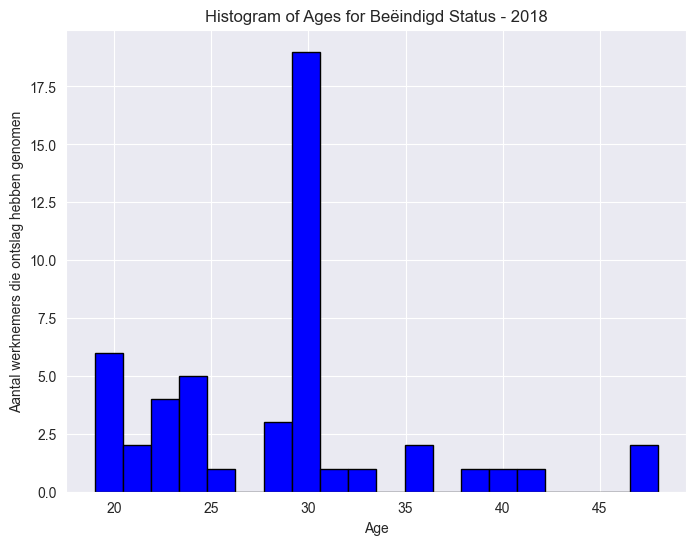

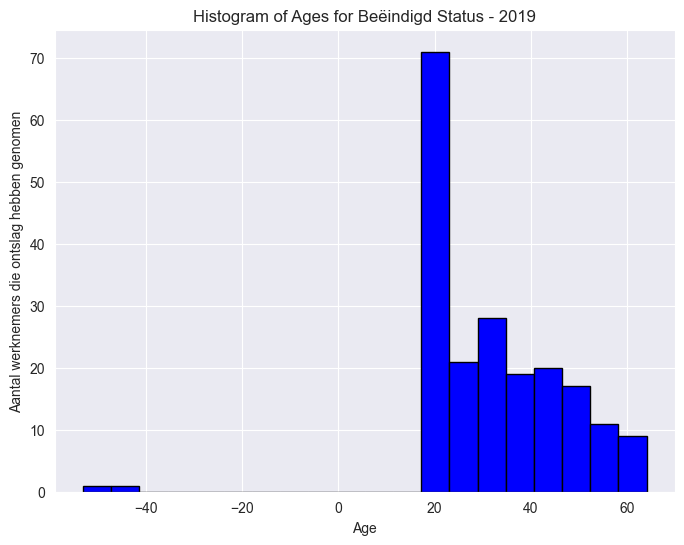

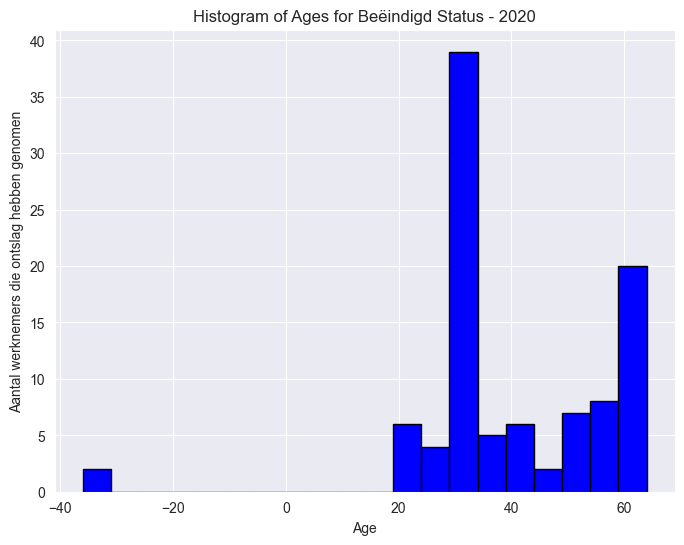

In [127]:
#Dummie STATUS
df = pd.get_dummies(df, columns=['STATUS'])
df

In [123]:
#Visualisaties met dummies
#Histogram van het aantal werknemers met STATUS beëindiging per jaar

df_beindigd = df[df['STATUS_Beeindigd'] == 1]

plt.figure(figsize=(10, 6))
plt.bar(df_beindigd['STATUS_JAAR'].value_counts().index, df_beindigd['STATUS_JAAR'].value_counts().values, color='blue', edgecolor='black', label='Aantal werknemers met STATUS_beëindiging')
plt.axhline(y=df_beindigd['STATUS_JAAR'].value_counts().mean(), color='red', linestyle='dashed', linewidth=2, label='Gemiddelde')

plt.xlabel('Jaar')
plt.ylabel('Aantal werknemers met STATUS beëindiging')
plt.title('Aantal werknemers met STATUS beëindiging per jaar')
plt.legend()
plt.show()



,WerknemerID,datum,geboortedatum,indiensttreding_datum,uitdiensttreding_datum,leeftijd,lengte_dienst,stad,afdeling,klant_id,...,STATUS_JAAR,BUSINESS_UNIT,STATUS_Actief,STATUS_BeÌÇindigd,uitdiensttreding_reden_Niet van toepassing,uitdiensttreding_reden_Ontslag,uitdiensttreding_reden_Pensioen,uitdiensttreding_reden_Vertrek,STATUS_Actief,STATUS_beëndiging
0,6962,2018-12-31 05:06:00,6/26/89 5:06,2013-05-23 05:06:00,2005-01-01 05:06:00,29.0,5,Amstelveen,BI,30,...,2018,Detachering,0,1,1,0,0,0,1,0
1,22981,2016-12-30 05:06:00,8/25/83 5:06,2010-04-24 05:06:00,2005-01-01 05:06:00,33.0,6,Utrecht,Accountant,21,...,2016,Detachering,0,1,1,0,0,0,1,0
2,5325,2018-12-31 05:06:00,4/24/76 5:06,2006-06-09 05:06:00,2005-01-01 05:06:00,42.0,12,Amsterdam,BI,42,...,2018,Detachering,0,1,1,0,0,0,1,0
3,8193,2018-12-31 05:06:00,10/26/98 5:06,2018-04-28 05:06:00,2005-01-01 05:06:00,20.0,-13,Utrecht,BI,21,...,2018,Detachering,0,1,1,0,0,0,1,0
4,5926,2013-12-31 05:06:00,3/19/81 5:06,2009-01-09 05:06:00,2005-01-01 05:06:00,32.0,4,Den Haag,Accountant,18,...,2013,Detachering,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49748,23132,2018-12-31 05:06:00,4/20/84 5:06,2010-08-28 05:06:00,2005-01-01 05:06:00,34.0,-5,Rotterdam,Business analist,46,...,2018,Detachering,0,1,1,0,0,0,1,0
49749,8025,2017-12-31 05:06:00,6/25/97 5:06,2017-08-12 05:06:00,2019-02-12 05:06:00,20.0,0,Amsterdam,NaN,44,...,2017,Detachering,0,1,1,0,0,0,1,0
49750,2632,2014-12-31 05:06:00,4/27/61 5:06,1998-07-09 05:06:00,2005-01-01 05:06:00,53.0,16,Haarlem,Business analist,5,...,2014,Detachering,0,1,1,0,0,0,1,0
49751,7122,2014-12-31 05:06:00,9/8/90 5:06,2014-01-10 05:06:00,2019-12-30 05:06:00,24.0,0,Barendrecht,Credit controller,13,...,2014,Detachering,0,1,1,0,0,0,1,0


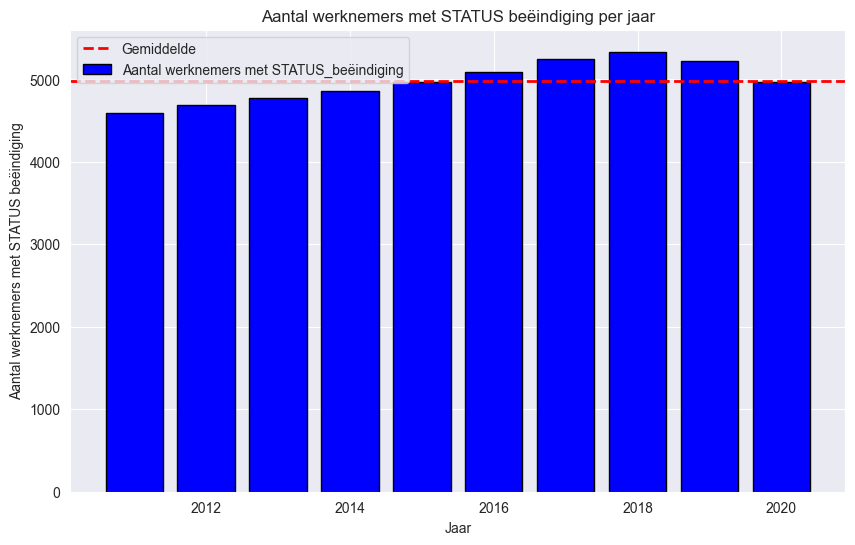